In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut

In [56]:
df = pd.read_csv('data.csv')
df.head(1000)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [58]:
df.dropna(inplace=True)

In [59]:
X = df.drop('liked', axis=1)
y = df['liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=255)
print(f"Dataset --> Tamanho treino: {X_train.shape[0]} | Tamanho teste: {X_test.shape[0]}")



Dataset --> Tamanho treino: 156 | Tamanho teste: 39


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=255)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=255)

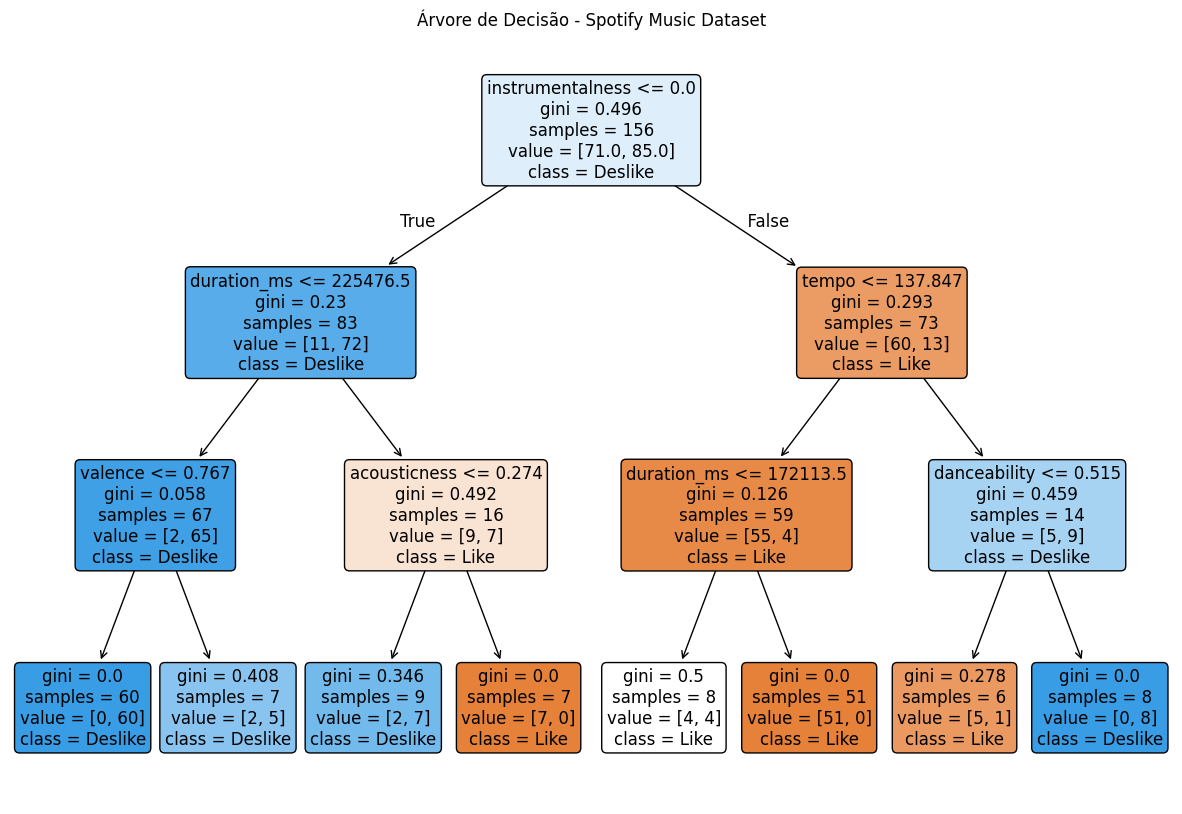

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))

plot_tree(clf,
          feature_names=X_train.columns,
          class_names=["Like", "Deslike"],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árvore de Decisão - Spotify Music Dataset")
plt.show()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8461538461538461

In [68]:
novaMedicao = df.drop(columns=['liked']).iloc[-4:]
novaMedicao

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
191,0.862,0.624,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4
192,0.499,0.351,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4
193,0.574,0.729,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5
194,0.747,0.666,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4


In [69]:
predicao = clf.predict(novaMedicao)
predicao

array([0, 0, 1, 1])

In [71]:
df.tail(4)['liked']

191    0
192    0
193    1
194    1
Name: liked, dtype: int64

In [72]:
#Acurácia
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

#Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")
#Sensibilidade
sensibilidade = recall_score(y_test, y_pred, pos_label=1)
print(f"Sensibilidade: {sensibilidade}")
#Especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidade = tn / (tn + fp)
print(f"Especificidade: {especificidade}")
#Calcular a precisão do modelo
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precisão: {precision}")

Acurácia: 0.8461538461538461
Sensibilidade: 0.8
Especificidade: 0.875
Precisão: 0.8
